In [19]:
import os
import numpy as np
from py3helpers.aws import AwsS3
from rrna_analysis.plot_experiment_table import plot_acc_heatmap_for_experiment
from rrna_analysis.multiple_model_accuracy import plot_accuracy_vs_delta_and_accuracy_over_time, preprocess_accuracy_csv
from rrna_analysis.kmer_pos_mapping import KmerPosMapping
import pandas as pd
from scipy.stats import norm, entropy
import matplotlib.pyplot as plt
from itertools import combinations
import math
mods_csv = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/control_position_files/mod_file.csv"
reference = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/yeast_25S_18S.fa"
positions = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/control_position_files/control_18S_25S_variants.positions"
kpm = KmerPosMapping(reference, positions, mods_csv)
# client = AwsS3()

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
model_n = 30
# key="accuracy"
# key="recall"
# key="specificity"
# key="precision"
# key="negative_predictive_value"
# key="recall"
# key="f1_score"
# key="brier_score"
# key="auroc"

max_percent=101
min_percent=0
min_delta=0
max_delta=np.inf

_control="/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/control/alt_canonical/train_500_test_500_prob_0.5_em_iterations_30_gaussian_true_FREQ_THRESHOLD_0_USE_IVT_TRAINING_true_unsupervised_false_all_kmers_false_alt_c_6mer"  
top_dirs = [_control]
round_n = 30
overwrite=True

Got final_data_frame: len=105
Got plot_df: len=105
Got mod_s3_urls: len=105


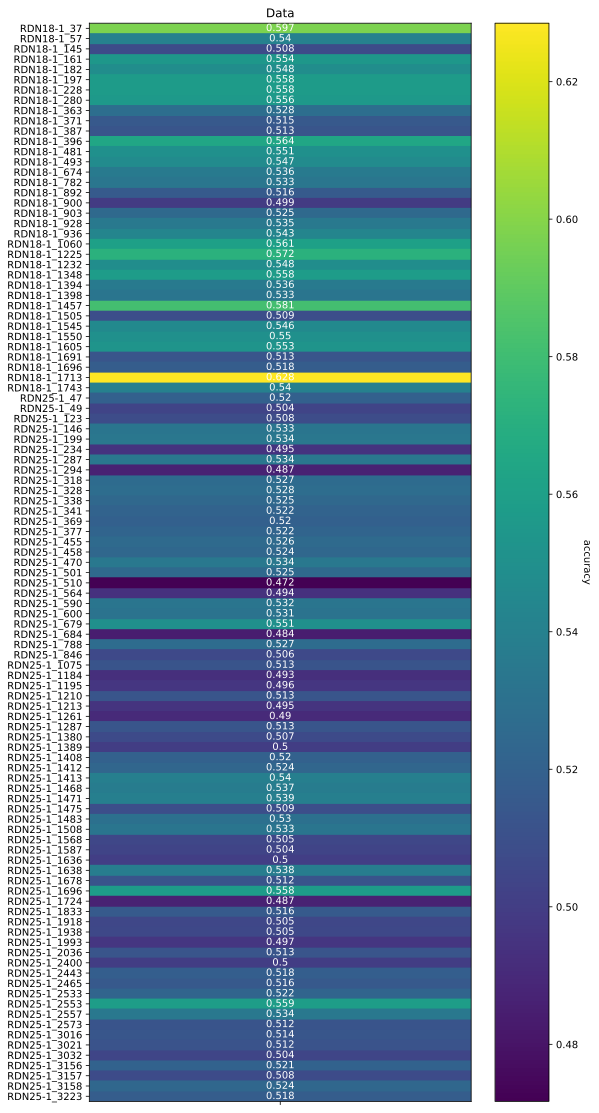

In [4]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')
savefig=None
# cmap = "seismic"
# recall_frac_max_percent = 90
# recall_frac_max_percent = 100
# norm = mpl.colors.Normalize(vmin=-1., vmax=.1)
# norm = mpl.colors.LogNorm(vmin=-1, vmax=1)
# norm = mpl.colors.SymLogNorm(linthresh=0.01, linscale=0.01, vmin=-1.0, vmax=1.0)
# norm = None
plot_acc_heatmap_for_experiment(top_dirs, "accuracy", kpm, max_percent=max_percent, min_percent=min_percent, min_delta=min_delta, max_delta=max_delta, round_n=round_n, show_numbers=True, client=client, overwrite=overwrite)


In [6]:
model_n = 30
# key="accuracy"
# key="recall"
# key="specificity"
# key="precision"
# key="negative_predictive_value"
# key="recall"
# key="f1_score"
# key="brier_score"
# key="auroc"

max_percent=100
min_percent=0
min_delta=0
max_delta=np.inf

_control="/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/control/alt_canonical/train_500_test_500_prob_0.5_em_iterations_30_gaussian_true_FREQ_THRESHOLD_0_USE_IVT_TRAINING_true_unsupervised_false_all_kmers_false_alt_c_6mer"  

key="accuracy"
high_percent=100
low_percent=0
low_delta=0
high_delta=np.inf
max_delta=True
aot=True
avd=True
model_n = 30


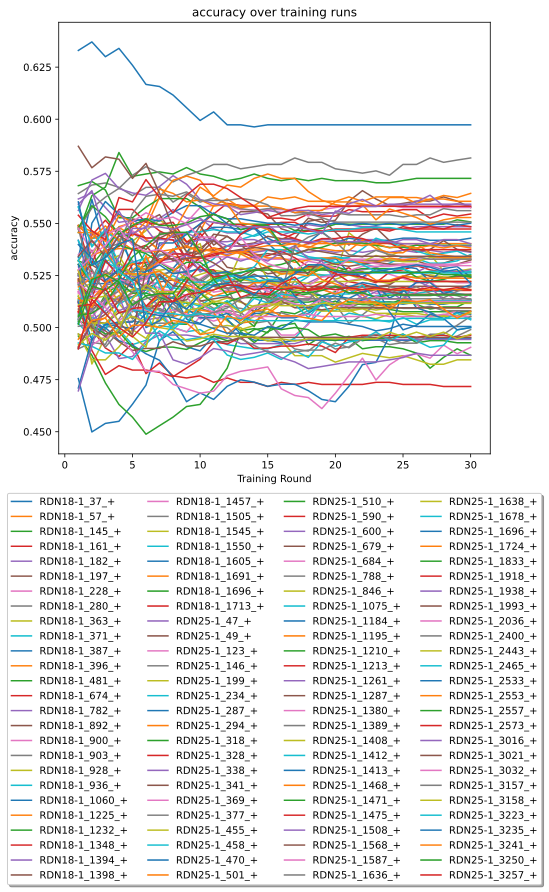

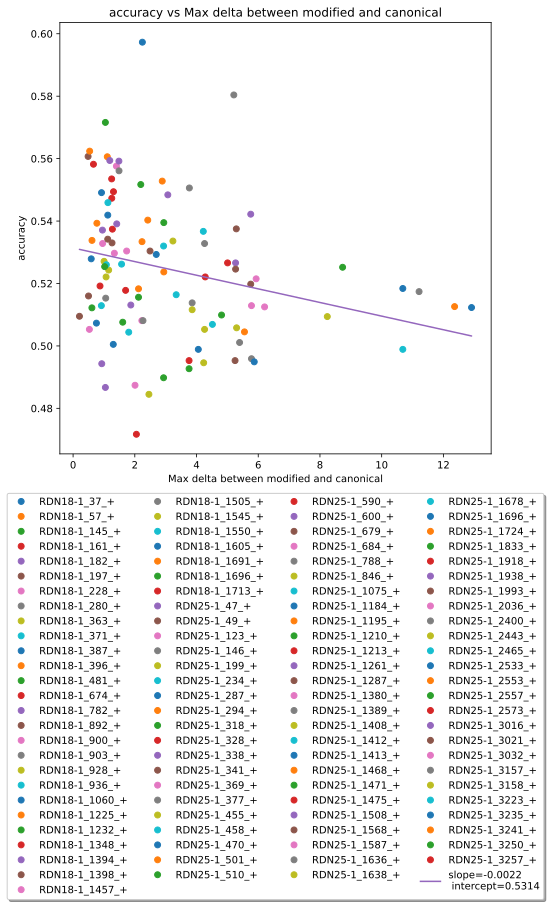

In [7]:
experiment_path = _control

dir_path = os.path.join(experiment_path, "testing_accuracy_csvs")
model_dir = os.path.join(experiment_path, "training_models")
p, k = plot_accuracy_vs_delta_and_accuracy_over_time(kpm,
                                                     dir_path, 
                                                     model_dir, 
                                                         model_n, 
                                                         high_percent=high_percent, 
                                                         low_percent=low_percent, 
                                                         low_delta=low_delta, 
                                                         high_delta=high_delta, 
                                                         key=key, 
                                                         max_delta=max_delta,
                                                         aot=aot,
                                                         avd=avd)  


In [4]:
from signalalign.hiddenMarkovModel import HmmModel


In [12]:
mods_csv = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/control_position_files/mod_file.csv"
reference = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/yeast_25S_18S.fa"
positions = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/control_position_files/control_18S_25S_variants.positions"
c_kpm = KmerPosMapping(reference, positions, mods_csv)

mods_csv = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/mod_files/mod_file.csv"
reference = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/yeast_25S_18S.fa"
alt_c_positions = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/alt_canonical_distribution/yeast_18S_25S_variants.positions"
# positions = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/mod_files/yeast_18S_25S_variants.positions"
e_kpm = KmerPosMapping(reference, alt_c_positions, mods_csv)


In [13]:
_control="/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/control/alt_canonical/train_500_test_500_prob_0.5_em_iterations_30_gaussian_true_FREQ_THRESHOLD_0_USE_IVT_TRAINING_true_unsupervised_false_all_kmers_false_alt_c_6mer"  
_experiment="/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/alt_canonical/gaussian/train_500_test_500_prob_0.5_em_iterations_30_gaussian_true_FREQ_THRESHOLD_0_USE_IVT_TRAINING_true_unsupervised_false_all_kmers_false"  
round_n = 30


In [14]:
def get_kmer_kl_divergence(model, kmer1, kmer2):
    """Get Kullback–Leibler divergence between the HDP and ONT models for a specific kmer"""
    normal_mean1, normal_sd1 = model.get_event_mean_gaussian_parameters(kmer1)
    normal_mean2, normal_sd2 = model.get_event_mean_gaussian_parameters(kmer2)

    ont_normal_dist1 = norm.pdf(model.linspace, normal_mean1, normal_sd1)
    ont_normal_dist2 = norm.pdf(model.linspace, normal_mean2, normal_sd2)

    kl_divergence = entropy(pk=ont_normal_dist2, qk=ont_normal_dist1, base=2)

    return kl_divergence

def bhattacharyya_distance(distribution1, distribution2):
    """ Estimate Bhattacharyya Distance (between General Distributions)
    
    Args:
        distribution1: a sample distribution 1
        distribution2: a sample distribution 2
    
    Returns:
        Bhattacharyya distance
    """
    sq = 0
    for i in range(len(distribution1)):
        sq  += np.sqrt(distribution1[i]*distribution2[i])
    
    return -np.log(sq)


def get_kmer_bhattacharyya_distance(model, kmer1, kmer2):
    """Get bhattacharyya distance between two distributions of two kmers of a model"""
    if model.has_hdp_model:
        kmer_id = model.get_kmer_index(kmer1)
        dist1 = model.all_posterior_pred[kmer_id]
        kmer_id = model.get_kmer_index(kmer2)
        dist2 = model.all_posterior_pred[kmer_id]
    else:
        normal_mean1, normal_sd1 = model.get_event_mean_gaussian_parameters(kmer1)
        normal_mean2, normal_sd2 = model.get_event_mean_gaussian_parameters(kmer2)

        dist1 = norm.pdf(model.linspace, normal_mean1, normal_sd1)
        dist2 = norm.pdf(model.linspace, normal_mean2, normal_sd2)

    bd = bhattacharyya_distance(dist1, dist2)

    return bd

def hellinger_distance(p, q):
    """Hellinger distance between two discrete distributions.
       Same as original version but without list comprehension
       source: https://stackoverflow.com/questions/45741850/python-hellinger-formula-explanation
    """
    list_of_squares = []
    for p_i, q_i in zip(p, q):

        # caluclate the square of the difference of ith distr elements
        s = (math.sqrt(p_i) - math.sqrt(q_i)) ** 2

        # append 
        list_of_squares.append(s)

    # calculate sum of squares
    sosq = sum(list_of_squares)    

    return sosq / math.sqrt(2)



def get_kmer_hellinger_distance(model, kmer1, kmer2):
    """Get hellinger distance between two distributions of two kmers of a model"""
    if model.has_hdp_model:
        kmer_id = model.get_kmer_index(kmer1)
        dist1 = model.all_posterior_pred[kmer_id]
        kmer_id = model.get_kmer_index(kmer2)
        dist2 = model.all_posterior_pred[kmer_id]
    else:
        normal_mean1, normal_sd1 = model.get_event_mean_gaussian_parameters(kmer1)
        normal_mean2, normal_sd2 = model.get_event_mean_gaussian_parameters(kmer2)

        dist1 = norm.pdf(model.linspace, normal_mean1, normal_sd1)
        dist2 = norm.pdf(model.linspace, normal_mean2, normal_sd2)

    hd = hellinger_distance(dist1, dist2)

    return hd



In [34]:
def get_acc_and_delta(experiment, round_n, key, kmer_pos_mapping, dist_function=get_kmer_bhattacharyya_distance, metric="max"):
    df = preprocess_accuracy_csv(os.path.join(experiment, f"training_accuracy_csvs/{round_n}_per_position_data_0.5.csv"), kmer_pos_mapping.subset_mod_data)
    model = HmmModel(os.path.join(experiment, f"training_models/template_hmm{round_n}.model"), rna=True)
    all_deltas = []
    all_key_numbers = []
    for group, data in df.groupby(["contig", "reference_index", "strand"]):
        mod = "_".join([str(x) for x in group])
        kmer_pairs = kmer_pos_mapping.get_kmers_covering_mod(contig=str(group[0]),
                                                             strand=str(group[2]),
                                                             position=int(group[1]))
        deltas = []
        assert kmer_pairs, f"missing contig, strand, position: contig, strand, position: " \
                           f"{group[0]}, {group[2]}, {group[1]}"
        for kmer_pair in kmer_pairs:
            kmer_pair = list(kmer_pair)
            if len(kmer_pair) > 2:
                subset_kmer_deltas = []
                subset_kmer_pairs = list(combinations(kmer_pair, 2))
                for k1, k2 in subset_kmer_pairs:
                    subset_kmer_deltas.append(dist_function(model, k1, k2))
                deltas.append(max(subset_kmer_deltas))
            else:
                deltas.append(dist_function(model, kmer_pair[0], kmer_pair[1]))
            if metric == "max":
                delta = max(deltas)
            elif metric == "sum":
                delta = sum(deltas)
            elif metric == "average":
                delta = np.average(deltas)
            else:
                raise Exception
        all_key_numbers.append(data[key].values[0])
        all_deltas.append(delta)

    return all_key_numbers, all_deltas

In [35]:
# key="accuracy"
# key="recall"
# key="specificity"
# key="precision"
# key="negative_predictive_value"
# key="recall"
# key="f1_score"
# key="brier_score"
# key="auroc"
key = "accuracy"
experiment = _control
kmer_pos_mapping = c_kpm
dist_function=get_kmer_bhattacharyya_distance
dist_function=get_kmer_hellinger_distance

metric="max"
metric="sum"
metric="average"



In [36]:
data = get_acc_and_delta(experiment, round_n, key, kmer_pos_mapping, dist_function=dist_function, metric=metric)

In [37]:
data2 = get_acc_and_delta(_experiment, round_n, key, e_kpm, dist_function=dist_function, metric=metric)

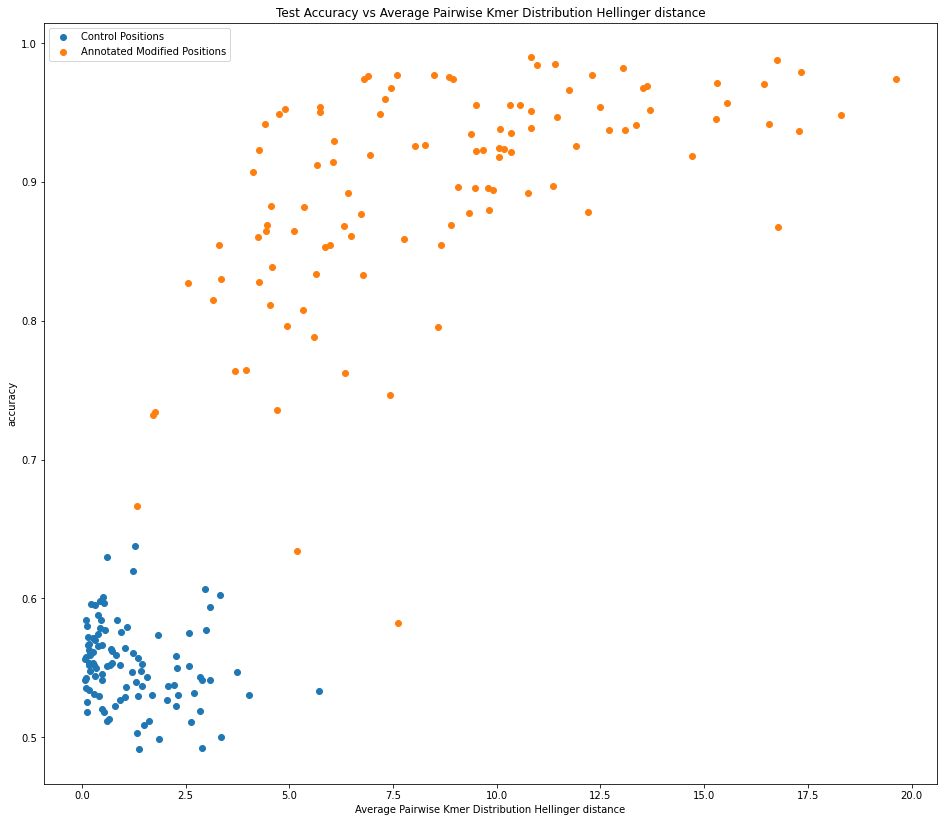

In [41]:
figure_path = "/Users/andrewbailey/CLionProjects/rrna_analysis/figures/control_experiment/hellinger_distance.svg"       
# figure_path = None
f, panel1 = plt.subplots(figsize=(16, 14))

panel1.set_title(f'Test Accuracy vs Average Pairwise Kmer Distribution Hellinger distance')
panel1.set_xlabel(f"Average Pairwise Kmer Distribution Hellinger distance")
panel1.set_ylabel(key)
# panel1.axvline(np.min(data[1]))
panel1.scatter(data[1], data[0], label="Control Positions")
panel1.scatter(data2[1], data2[0], label="Annotated Modified Positions")

panel1.legend()
if figure_path is not None:
    assert not os.path.exists(figure_path), "Save fig path does exist: {}".format(figure_path)
    plt.savefig(figure_path)
else:
    plt.show()


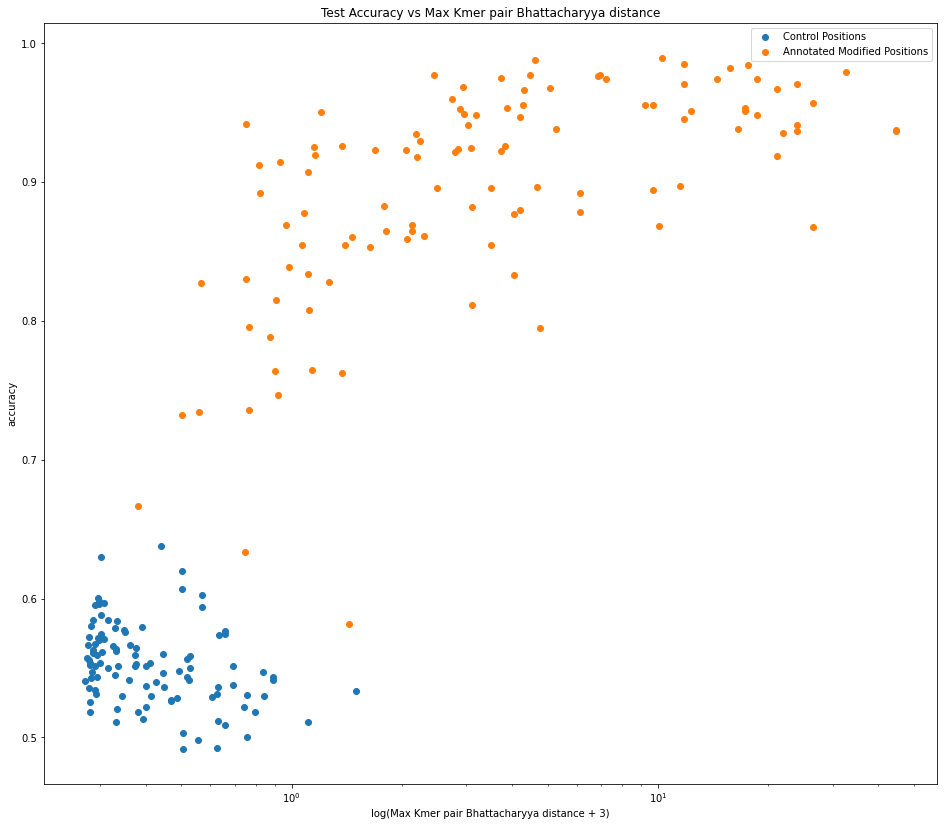

In [127]:
figure_path = "/Users/andrewbailey/CLionProjects/rrna_analysis/figures/control_experiment/bhattacharyya_log_distance.png"       
f, panel1 = plt.subplots(figsize=(16, 14))

panel1.set_title(f'Test Accuracy vs Max Kmer pair Bhattacharyya distance')
panel1.set_xlabel(f"log(Max Kmer pair Bhattacharyya distance + 3)")
panel1.set_ylabel(key)
panel1.set_xscale('log')
# panel1.axvline(np.min(data[1]))
panel1.scatter(data[1]+np.array(3), data[0], label="Control Positions")
panel1.scatter(data2[1]+np.array(3), data2[0], label="Annotated Modified Positions")

panel1.legend()
if figure_path is not None:
    assert not os.path.exists(figure_path), "Save fig path does exist: {}".format(figure_path)
    plt.savefig(figure_path, dpi=500)
else:
    plt.show()


# Plot bhattacharyya distance
Want to make sure the bhattacharyya distance metric tracks well with overlapping distributions as well as large gaps or separations between distributions

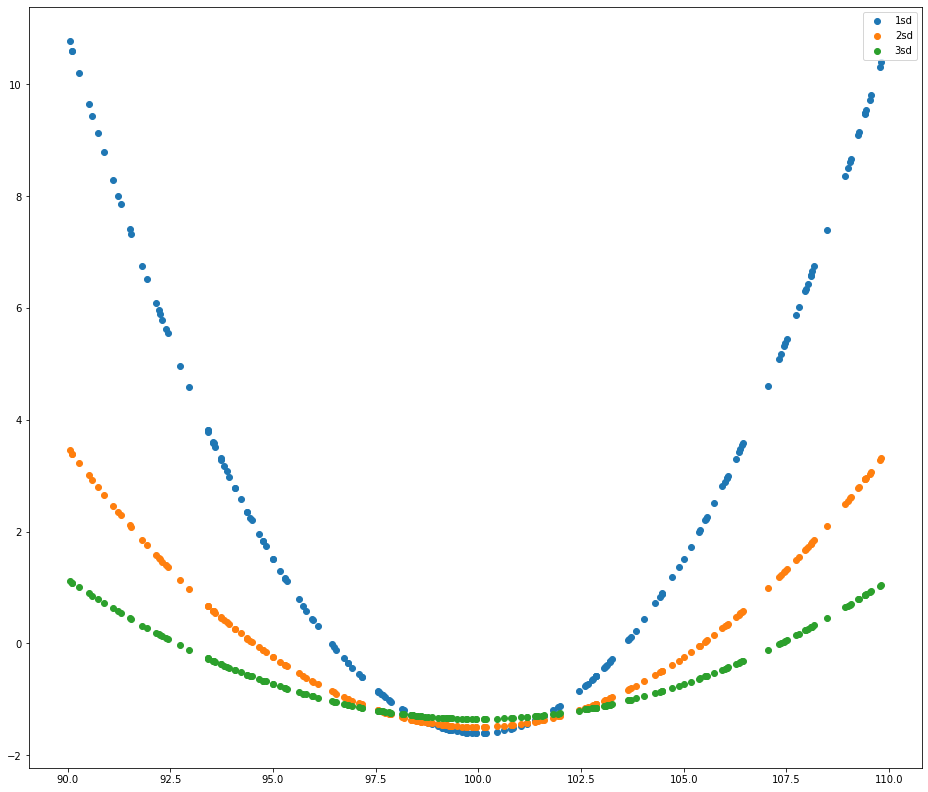

In [125]:
base_mean = 100
sd = 1
means = np.random.uniform(90, 110, 200)
linspace = np.linspace(0, 200, num=1000)
ont_normal_dist1 = norm.pdf(linspace, base_mean, sd)

bds = []
bds_2 = []
bds_3 = []

for mean in means:
    ont_normal_dist2 = norm.pdf(linspace, mean, sd)
    bd = bhattacharyya_distance(ont_normal_dist1, ont_normal_dist2)
    bds.append(bd)
    ont_normal_dist2 = norm.pdf(linspace, mean, 2)
    bd = bhattacharyya_distance(ont_normal_dist1, ont_normal_dist2)
    bds_2.append(bd)
    ont_normal_dist2 = norm.pdf(linspace, mean, 3)
    bd = bhattacharyya_distance(ont_normal_dist1, ont_normal_dist2)
    bds_3.append(bd)

f, panel1 = plt.subplots(figsize=(16, 14))
panel1.scatter(means, bds, label="1sd")
panel1.scatter(means, bds_2, label="2sd")
panel1.scatter(means, bds_3, label="3sd")
panel1.legend()

